In [1]:
import pandas as pd
from icecream import ic
import json
from ogb.nodeproppred import PygNodePropPredDataset
import torch_geometric.transforms as T
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt
import networkx as nx
import torch

In [10]:
"The ogbn-arxiv dataset is a directed graph, representing the citation network between all Computer Science (CS) arXiv papers indexed by MAG [1]. Each node is an arXiv paper and each directed edge indicates that one paper cites another one. Each paper comes with a 128-dimensional feature vector obtained by averaging the embeddings of words in its title and abstract."

"The ogbn-products dataset is an undirected and unweighted graph, representing an Amazon product co-purchasing network [1]. Nodes represent products sold in Amazon, and edges between two products indicate that the products are purchased together. We follow [2] to process node features and target categories. Specifically, node features are generated by extracting bag-of-words features from the product descriptions followed by a Principal Component Analysis to reduce the dimension to 100."

"The ogbn-proteins dataset is an undirected, weighted, and typed (according to species) graph. Nodes represent proteins, and edges indicate different types of biologically meaningful associations between proteins, e.g., physical interactions, co-expression or homology [1,2]. All edges come with 8-dimensional features, where each dimension represents the approximate confidence of a single association type and takes values between 0 and 1 (the larger the value is, the more confident we are about the association). The proteins come from 8 species."

"The ogbn-mag dataset is a heterogeneous network composed of a subset of the Microsoft Academic Graph (MAG) [1]. It contains four types of entities—papers (736,389 nodes), authors (1,134,649 nodes), institutions (8,740 nodes), and fields of study (59,965 nodes)—as well as four types of directed relations connecting two types of entities—an author is “affiliated with” an institution, an author “writes” a paper, a paper “cites” a paper, and a paper “has a topic of” a field of study. Similar to ogbn-arxiv, each paper is associated with a 128-dimensional word2vec feature vector, and all the other types of entities are not associated with input node features."

dataset = PygNodePropPredDataset(name = "ogbn-arxiv")

graph = dataset[0] # pyg graph object
print(dataset[0])
edge_index = dataset[0]['edge_index']
edges_df = pd.DataFrame({
    'source': edge_index[0, :].numpy(),
    'target': edge_index[1, :].numpy()
})
print(edges_df.head())
print(dataset[0]['x'])

G = to_networkx(graph, to_undirected=True)

print("Data keys:", graph.keys)
print("Number of nodes:", graph.num_nodes)
print("Number of edges:", graph.num_edges)
print("Number of node features:", graph.num_node_features)
print("Number of edge features:", graph.num_edge_features)

Data(num_nodes=169343, edge_index=[2, 1166243], x=[169343, 128], node_year=[169343, 1], y=[169343, 1])
   source  target
0  104447   13091
1   15858   47283
2  107156   69161
3  107156  136440
4  107156  107366
tensor([[-0.0579, -0.0525, -0.0726,  ...,  0.1734, -0.1728, -0.1401],
        [-0.1245, -0.0707, -0.3252,  ...,  0.0685, -0.3721, -0.3010],
        [-0.0802, -0.0233, -0.1838,  ...,  0.1099,  0.1176, -0.1399],
        ...,
        [-0.2205, -0.0366, -0.4022,  ...,  0.1134, -0.1614, -0.1452],
        [-0.1382,  0.0409, -0.2518,  ..., -0.0893, -0.0413, -0.3761],
        [-0.0299,  0.2684, -0.1611,  ...,  0.1208,  0.0776, -0.0910]])
Data keys: <bound method BaseData.keys of Data(num_nodes=169343, edge_index=[2, 1166243], x=[169343, 128], node_year=[169343, 1], y=[169343, 1])>
Number of nodes: 169343
Number of edges: 1166243
Number of node features: 128
Number of edge features: 0


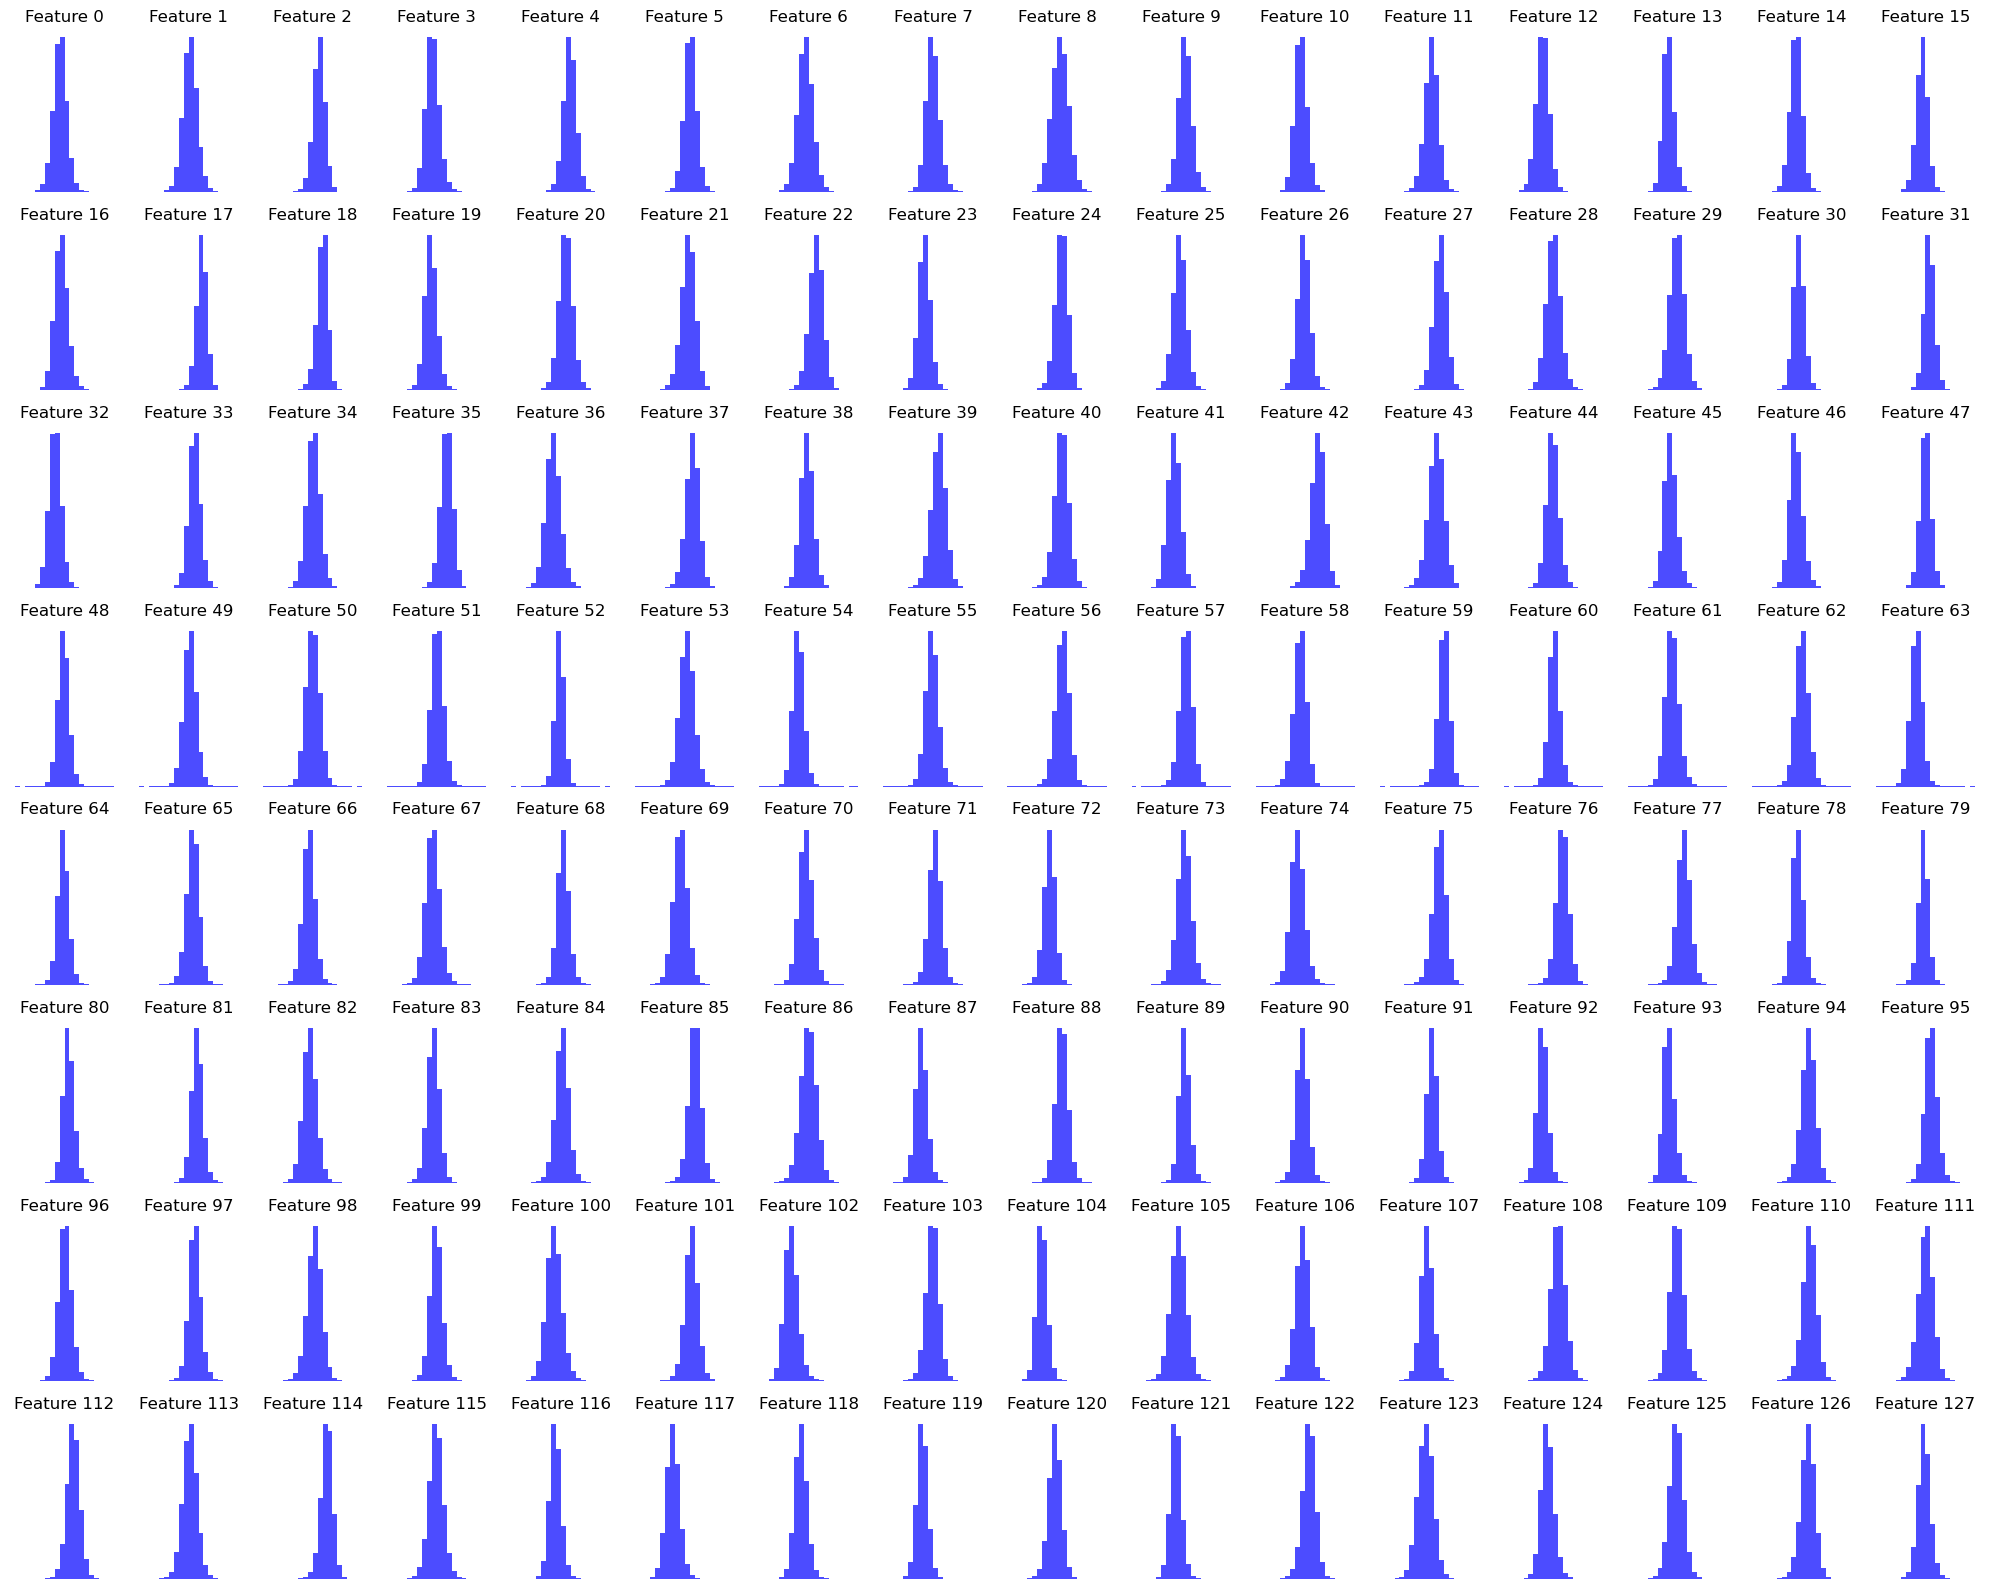

In [3]:
features = graph.x
num_features = features.shape[1]
cols = 16  # Choose a number that can divide the num_features or is just greater than the square root of num_features
rows = num_features // cols + (num_features % cols > 0)  # Ensuring we have enough rows

plt.figure(figsize=(20, 2 * rows))  # Adjust the size as needed
for i in range(num_features):
    plt.subplot(rows, cols, i + 1)
    plt.hist(features[:, i].numpy(), bins=20, color='blue', alpha=0.7)
    plt.title(f'Feature {i}')
    plt.axis('off')
plt.tight_layout()
plt.show()

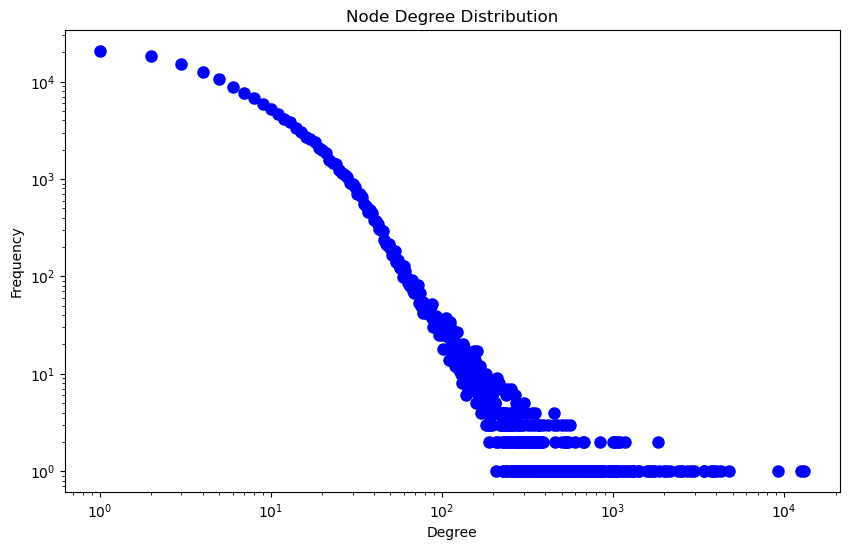

In [4]:
# Node degree analysis
degrees = pd.Series([val for (node, val) in G.degree()])
degree_counts = degrees.value_counts()
plt.figure(figsize=(10, 6))
plt.loglog(degree_counts.index, degree_counts.values, marker='o', linestyle='None', markersize=8, color='b')
plt.title('Node Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

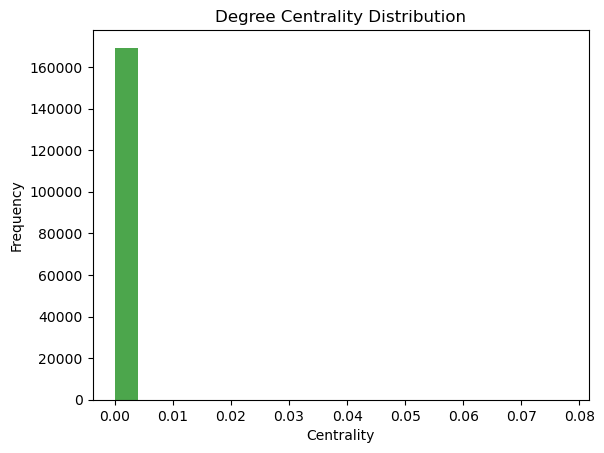

In [5]:
# Calculate and plot centrality measures for the first 1000 nodes to keep it computationally reasonable
#subG = G.subgraph(list(range(1000)))  # Analysis on a subgraph due to computational limitations
degree_centrality = nx.degree_centrality(G)
plt.hist(list(degree_centrality.values()), bins=20, color='green', alpha=0.7)
plt.title('Degree Centrality Distribution')
plt.xlabel('Centrality')
plt.ylabel('Frequency')
plt.show()

In [12]:
print(graph)
node_features = graph.x
edge_index = graph.edge_index

# Count total and missing node features
total_node_features = torch.numel(node_features)
missing_node_features = torch.isnan(node_features).sum().item()

print(f"Total node features: {total_node_features}")
print(f"Missing node features: {missing_node_features}")
if total_node_features > 0:
    print(f"Percentage of missing node data: {100 * missing_node_features / total_node_features:.2f}%")

Data(num_nodes=169343, edge_index=[2, 1166243], x=[169343, 128], node_year=[169343, 1], y=[169343, 1])
Total node features: 21675904
Missing node features: 0
Percentage of missing node data: 0.00%
